In [1]:
import pandas as pd 

NBA = pd.read_csv("NBA_Advanced_Stats_2002-2022.csv")
NBA = NBA.fillna(0)
NBA.head()

,Unnamed: 0,year-name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,0,2003-Tariq Abdul-Wahad,SG,28,DAL,14,204,12.4,0.470,0.017,...,15.0,0.2,0.2,0.4,0.104,-1.6,0.2,-1.4,0.0,2003
1,1,2003-Shareef Abdur-Rahim,PF,26,ATL,81,3087,19.9,0.566,0.051,...,24.2,7.4,2.3,9.7,0.151,2.3,-0.7,1.6,2.8,2003
2,2,2003-Courtney Alexander,PG,25,NOH,66,1360,9.3,0.459,0.113,...,21.3,0.1,1.0,1.1,0.040,-3.3,-1.2,-4.5,-0.9,2003
3,3,2003-Malik Allen,PF,24,MIA,80,2318,9.9,0.455,0.005,...,19.7,-1.7,2.6,0.9,0.018,-3.9,-0.4,-4.4,-1.4,2003
4,4,2003-Ray Allen,SG,27,TOT,76,2880,21.3,0.565,0.391,...,27.8,7.6,1.5,9.1,0.152,4.7,-1.0,3.6,4.1,2003


In [2]:
len(NBA)

12211

In [3]:
#Remove players from before 2017

i = 0
for year in NBA.year:
    if year < 2017:
        NBA = NBA.drop(labels = NBA.index[i])
    else:
        i += 1        
        
NBA = NBA.rename(columns={"year-name": "year_name"})
#NBA = NBA.drop(['year','Tm','year_name','Unnamed: 0', 'Pos', 'G'], axis=1)
NBA.head()

,Unnamed: 0,year_name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
8076,8076,2017-Álex Abrines,SG,23,OKC,68,1055,10.1,0.560,0.724,...,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,2017
8077,8077,2017-Quincy Acy,PF,26,TOT,38,558,11.8,0.565,0.529,...,16.8,0.5,0.5,0.9,0.082,-1.5,-0.6,-2.1,0.0,2017
8078,8078,2017-Quincy Acy,PF,26,DAL,6,48,-1.4,0.355,0.412,...,20.0,-0.2,0.0,-0.1,-0.133,-10.3,-4.1,-14.3,-0.1,2017
8079,8079,2017-Quincy Acy,PF,26,BRK,32,510,13.1,0.587,0.542,...,16.5,0.6,0.5,1.1,0.102,-0.6,-0.2,-0.9,0.1,2017
8080,8080,2017-Steven Adams,C,23,OKC,80,2389,16.5,0.589,0.002,...,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,2017


In [4]:
import numpy as np

#Create new column showing if a player was an All-Star at a given year 
stars = ['2017-Kyrie Irving','2017-Stephen Curry','2017-DeMar DeRozan','2017-James Harden','2017-Lebron James','2017-Kevin Durant','2017-Giannis Antetokounmpo.','2017-Kawhi Leonard',
'2017-Jimmy Butler','2017-Anthony Davis','2017-Isaiah Thomas','2017-Russell Westbrook','2017-Kyle Lowry','2017-Klay Thompson','2017-Kemba Walker','2017-Gordon Hayward'
,'2017-Paul George','2017-DeMarcus Cousins','2017-Kevin Love''2017-Draymond Green','2017-Paul Millsap','2017-DeAndre Jordan','2017-John Wall','2017-Marc Gasol'
,'2017-Carmelo Anthony',
        '2018-Kyrie Irving', '2018-Stephen Curry', '2018-Kevin Durant', '2018-James Harden', '2018-Lebron James', '2018-DeMar DeRozan',
         '2018-DeMarcus Cousins', '2018-Giannis Antetokounmpo', '2018-Anthony Davis', '2018-Joel Embiid', '2018-Bradley Beal', '2018-Al Horford', '2018-LaMarcus Aldridge', '2018-Jimmy Butler',
         '2018-Kevin Love', '2018-Draymond Green', '2018-Russell Westbrook', '2018-Damian Lillard', '2018-Victor Oladipo', '2018-Klay Thompson',
         '2018-Kristaps Porzingis', '2018-Karl-Anthony Towns', '2018-John Wall', '2018-Kyle Lowry', '2018-Andre Drummond', '2018-Goran Dragic', '2018-Kemba Walker', '2018-Paul George',
        '2019-Giannis Antetokounmpo', '2019-Stephen Curry', '2019-Joel Embiid', '2019-Paul George', '2019-Kemba Walker', '2019-Khris Middleton', '2019-Nikola Jokic', '2019-Blake Griffin',
         '2019-Russell Westbrook', "2019-D'Angelo Russell", '2019-Nikola Vucevic', '2019-Kyle Lowry', '2019-Dirk Nowitzki',
        '2019-LeBron James', '2019-Kevin Durant', '2019-Kyrie Irving', '2019-Kawhi Leonard', '2019-James Harden', '2019-Anthony Davis', 
         '2019-Ben Simmons', '2019-Damian Lillard', '2019-Bradley Beal', '2019-Klay Thompson', '2019-LaMarcus Aldridge', '2019-Karl-Anthony Towns',
         '2019-Dwyane Wade'
        ,'2020-Anthony Davis', '2020-James Harden', '2020-Kawhi Leonard', '2020-Luka Doncic', '2020-Lebron James', '2020-Chris Paul',
         '2020-Damian Lillard', '2020-Devin Booker', '2020-Nikola Jokic', '2020-Ben Simmons', '2020-Domantas Sabonis', '2020-Jayson Tatum', '2020-Russell Westbrook',
         '2020-Giannis Antetokounmpo', '2020-Joel Embiid', '2020-Pascal Siakam', '2020-Kemba Walker', '2020-Trae Young', '2020-Bam Adebayo', '2020-Brandon Ingram',
         '2020-Donovan Mitchell', '2020-Jimmy Butler', '2020-Rudy Gobert', '2020-Kyle Lowry', '2020-Khris Middleton',
        '2021-LeBron James', '2021-Kevin Durant', '2021-Kyrie Irving', '2021-Bradley Beal', '2021-Giannis Antetokounmpo', '2021-Joel Embiid', 
         '2021-Stephen Curry', '2021-Luka Doncic', '2021-Kawhi Leonard', '2021-Nikola Jokic', '2021-Paul George', '2021-Damian Lillard', 
         '2021-Donovan Mitchell', '2021-Rudy Gobert', '2021-Zion Williamson', '2021-Anthony Davis', '2021-James Harden', '2021-Julius Randle',
         '2021-Jayson Tatum', '2021-Jaylen Brown', '2021-Zach LaVine', '2021-Ben Simmons', '2021-Nikola Vucevic',
        '2022-Stephen Curry', '2022-DeMar DeRozan', '2022-LeBron James', '2022-Giannis Antetokounmpo', '2022-Nikola Jokić', '2022-Chris Paul',
         '2022-Fred VanVleet', '2022-Luka Dončić', '2022-Donovan Mitchell', '2022-Darius Garland', '2022-Jimmy Butler', '2022-Jarrett Allen', '2022-Trae Young',
         '2022-Ja Morant', '2022-Jayson Tatum', '2022-Andrew Wiggins', '2022-Joel Embiid', '2022-LaMelo Ball', '2022-Dejounte Murray',
         '2022-Zach LaVine', '2022-Devin Booker', '2022-Khris Middleton', '2022-Rudy Gobert', '2022-Karl-Anthony Towns', '2022-James Harden']

NBA['All_Star'] = NBA['year_name'].apply(lambda x: x in stars)

In [5]:
AS_NBA = NBA

#DF of only All-Stars
All_Stars = AS_NBA[AS_NBA.All_Star == True]

# Seperate All Stars into frontcourt and backcourt 
FC = All_Stars[All_Stars['Pos'].isin(['PG','SG'])]
BC = All_Stars[All_Stars['Pos'].isin(['SF','PF','C'])]

#Seperate elligable players into frontcourt and backcourt
NBA_FC = NBA[NBA['Pos'].isin(['PG','SG'])]
NBA_BC = NBA[NBA['Pos'].isin(['SF','PF','C'])] 

AS_NBA.head()

,Unnamed: 0,year_name,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year,All_Star
8076,8076,2017-Álex Abrines,SG,23,OKC,68,1055,10.1,0.560,0.724,...,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1,2017,False
8077,8077,2017-Quincy Acy,PF,26,TOT,38,558,11.8,0.565,0.529,...,0.5,0.5,0.9,0.082,-1.5,-0.6,-2.1,0.0,2017,False
8078,8078,2017-Quincy Acy,PF,26,DAL,6,48,-1.4,0.355,0.412,...,-0.2,0.0,-0.1,-0.133,-10.3,-4.1,-14.3,-0.1,2017,False
8079,8079,2017-Quincy Acy,PF,26,BRK,32,510,13.1,0.587,0.542,...,0.6,0.5,1.1,0.102,-0.6,-0.2,-0.9,0.1,2017,False
8080,8080,2017-Steven Adams,C,23,OKC,80,2389,16.5,0.589,0.002,...,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,2017,False


In [6]:
NBA = NBA.drop(['year','Tm','year_name','Unnamed: 0', 'Pos', 'G','All_Star'], axis=1)

In [7]:
NBA.head()

,Age,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
8076,23,1055,10.1,0.560,0.724,0.144,1.9,7.1,4.5,5.5,...,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1
8077,26,558,11.8,0.565,0.529,0.353,3.9,18.0,11.0,4.9,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.5,-0.6,-2.1,0.0
8078,26,48,-1.4,0.355,0.412,0.176,4.6,15.2,9.7,0.0,...,9.8,20.0,-0.2,0.0,-0.1,-0.133,-10.3,-4.1,-14.3,-0.1
8079,26,510,13.1,0.587,0.542,0.373,3.8,18.2,11.1,5.4,...,9.6,16.5,0.6,0.5,1.1,0.102,-0.6,-0.2,-0.9,0.1
8080,23,2389,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1


In [8]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

NBA['Age'] = np.array(NBA.Age, dtype='float64')
NBA['MP'] = np.array(NBA.MP, dtype='float64')

std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(NBA)

pca = PCA(n_components=3)
frame = pca.fit_transform(scaled_df)

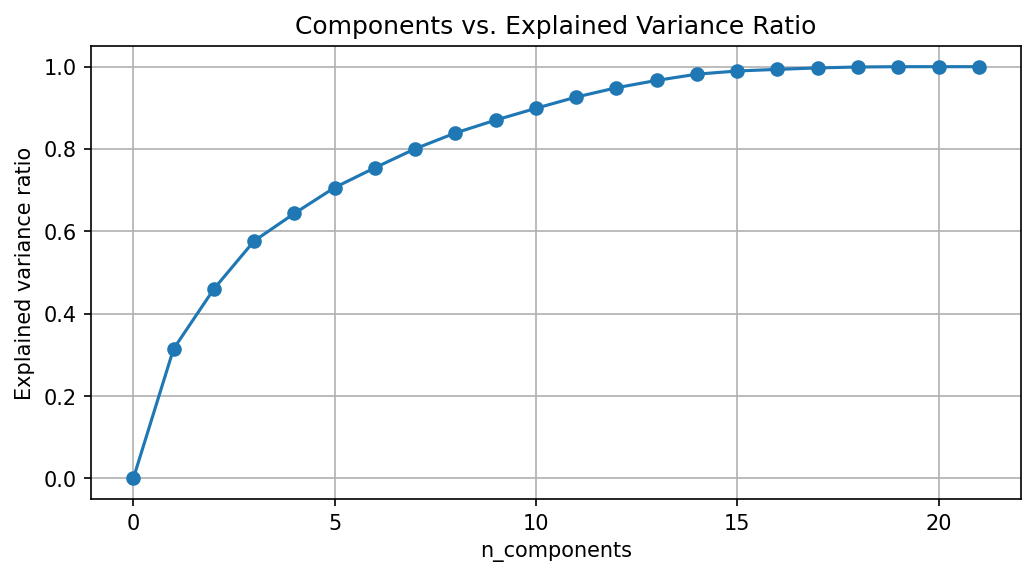

In [9]:
import matplotlib.pyplot as plt

nums = np.arange(22)

var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scaled_df)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,4),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('Components vs. Explained Variance Ratio')

plt.savefig("Explained Variance Ratio") 
plt.show()

In [10]:
col = AS_NBA['All_Star']
df = pd.DataFrame({'Pos': AS_NBA['Pos'],'Component_1': frame[:, 0], 'Component_2': frame[:, 1], 'Component_3': frame[:, 2], 'All_Star': col})

#Seperate elligable players into frontcourt and backcourt
df_FC = df[df['Pos'].isin(['PG','SG'])]
df_BC = df[df['Pos'].isin(['SF','PF','C'])] 

df_AS = df[df['All_Star'] == True]
print(len(df_AS))

143


<Figure size 432x288 with 0 Axes>

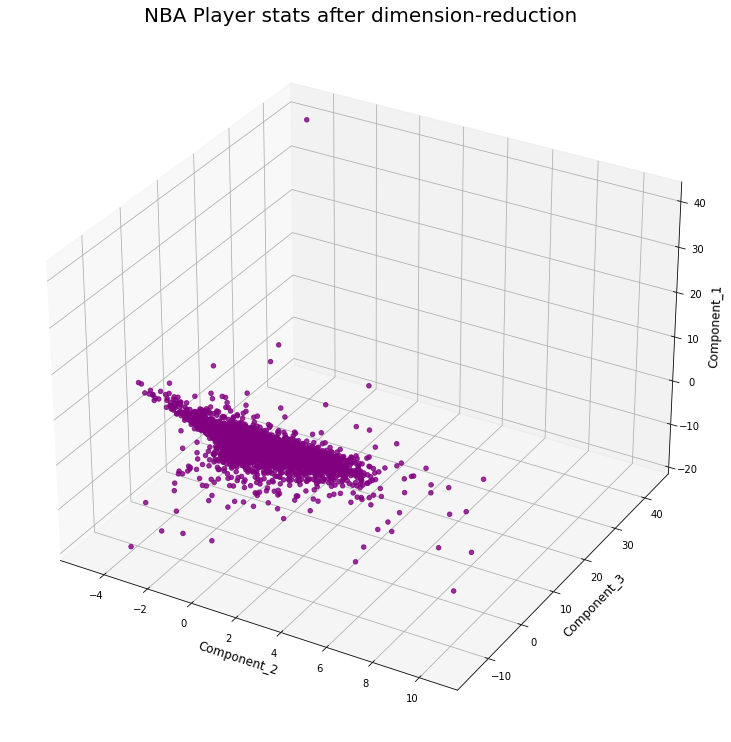

In [11]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
 
# syntax for 3-D projection
fig = plt.figure(figsize=(15, 13))
ax = plt.axes( projection ='3d')
 
# defining all 3 axis
z = df.Component_1
x = df.Component_2
y = df.Component_3
 
# plotting

ax.scatter(x, y, z,c = 'purple', alpha = 0.8)

ax.set_title('NBA Player stats after dimension-reduction', fontsize =20)
ax.set_xlabel('Component_2', fontsize=12)
ax.set_ylabel('Component_3', fontsize=12)
ax.set_zlabel('Component_1', fontsize=12)

plt.savefig("NBA_Player_stats_after_dimension_reduction.png") 
plt.show()

<Figure size 432x288 with 0 Axes>

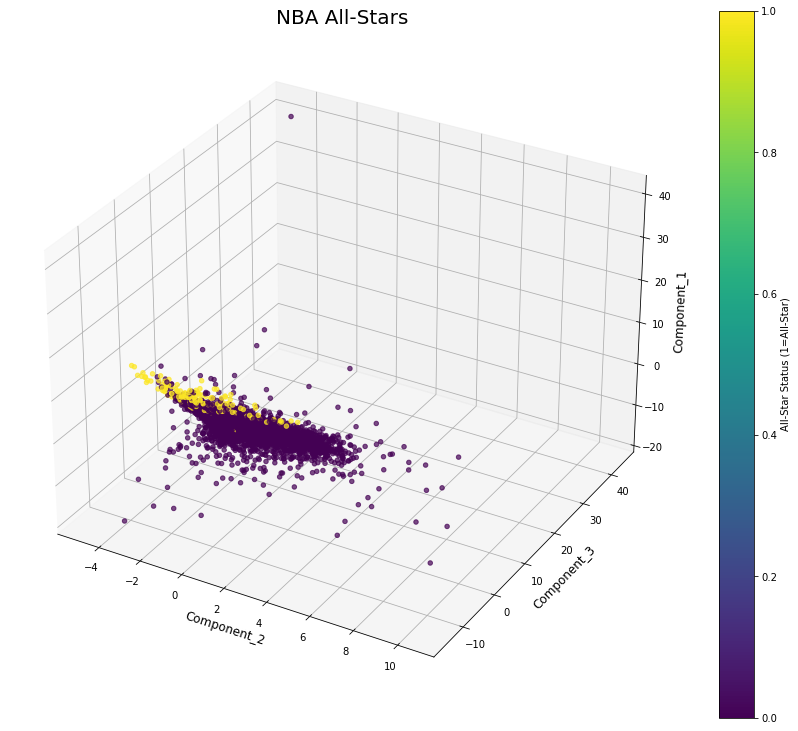

In [12]:
fig = plt.figure()
 
# syntax for 3-D projection
fig = plt.figure(figsize=(15, 13))
ax = plt.axes( projection ='3d')
 
# plotting

ax.scatter(x, y, z, c = df.All_Star, alpha = 0.7)

ax.set_title('NBA All-Stars', fontsize = 20)
ax.set_xlabel('Component_2', fontsize=12)
ax.set_ylabel('Component_3', fontsize=12)
ax.set_zlabel('Component_1', fontsize=12)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
#sm.set_array([])
plt.colorbar(sm, label='All-Star Status (1=All-Star)')

plt.savefig("NBA_All_Stars.png") 
plt.show()

Accuracy of all players: 0.9772893772893773
Precision of all players: 0.8125
Recall of all players: 0.5098039215686274
F1-score of all players: 0.6265060240963856


C:\Users\ayoad\Downloads\Anaconda\A\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[False  True] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


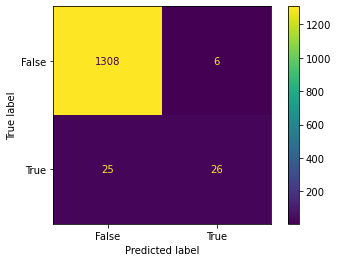

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Separate features and target variable
X = df[['Component_1', 'Component_2', 'Component_3']]
y = df['All_Star']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)
CM = ConfusionMatrixDisplay(cm, model.classes_)
CM.plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy of all players:", accuracy)
print("Precision of all players:", precision)
print("Recall of all players:", recall)
print("F1-score of all players:", f1)

Accuracy ONLY Frontcourt players: 0.9809027777777778
Precision ONLY Frontcourt players: 0.8666666666666667
Recall ONLY Frontcourt players: 0.5909090909090909
F1-score ONLY Frontcourt players: 0.7027027027027029
   
Accuracy ONLY Backcourt players: 0.9752604166666666
Precision ONLY Backcourt players: 0.7058823529411765
Recall ONLY Backcourt players: 0.46153846153846156
F1-score ONLY Backcourt players: 0.558139534883721


C:\Users\ayoad\Downloads\Anaconda\A\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[False  True] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\ayoad\Downloads\Anaconda\A\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[False  True] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


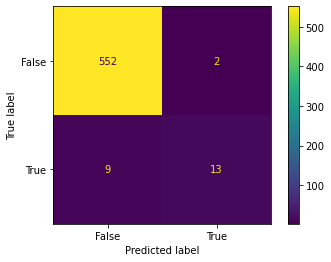

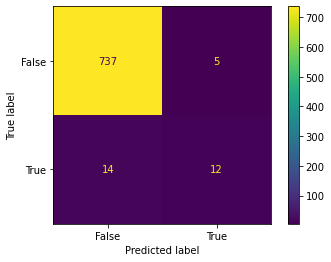

In [14]:
# Separate features and target variable
X = df_FC[['Component_1', 'Component_2', 'Component_3']]
y = df_FC['All_Star']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, model.classes_).plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy ONLY Frontcourt players:", accuracy)
print("Precision ONLY Frontcourt players:", precision)
print("Recall ONLY Frontcourt players:", recall)
print("F1-score ONLY Frontcourt players:", f1)

#BACKCOURT
#BACKCOURT

X = df_BC[['Component_1', 'Component_2', 'Component_3']]
y = df_BC['All_Star']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
CM = ConfusionMatrixDisplay(cm, model.classes_)
CM.plot()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('   ')
print("Accuracy ONLY Backcourt players:", accuracy)
print("Precision ONLY Backcourt players:", precision)
print("Recall ONLY Backcourt players:", recall)
print("F1-score ONLY Backcourt players:", f1)

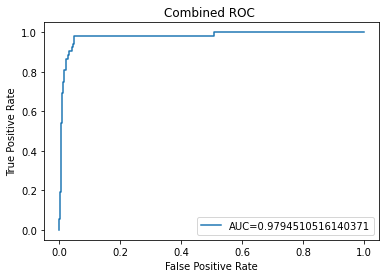

In [31]:
from sklearn import metrics
# Separate features and target variable
X = df[['Component_1', 'Component_2', 'Component_3']]
y = df['All_Star']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Combined ROC ')
plt.legend(loc=4)

plt.savefig("ROC.png") 
plt.show()